In [1]:
# importing basic packages
import pandas as pd
import numpy as np

# importing visualization packages
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

# packages required for time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller

# packages required for nave bayes
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from scipy.stats import ttest_ind

from sklearn.cluster import KMeans

# Path of the dataset
path = "incidents-100k.csv"

## 1. We try to visualize the density of different type of crimes based on the description recorded in the dataset. We can achieve this using a word cloud


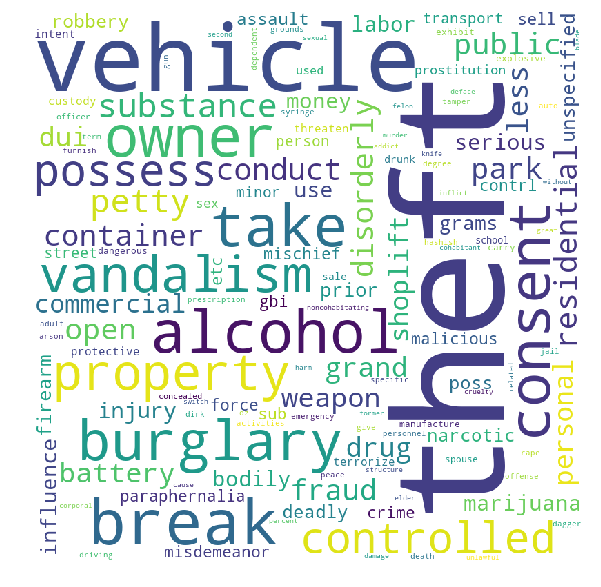

In [2]:
# Reading the csv file
df=pd.read_csv(path)

# A random Sample is taken because , the dataset contains 100k rows and will reqiure some time  to run.
df = df.sample(n=10000)
comment_words = ' '
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df.desc: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
            comment_words = comment_words + words + ' '
#generating the word cloud.
        
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                collocations = False,
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# From the word cloud, we can infer that 'theft' is the most common word in the description of crime.

## Plotting a bar plot to visualize number of crimes v/s different asr_zone

[3624, 28537, 5793, 7586, 10553, 194, 31518, 9787, 390, 2018]


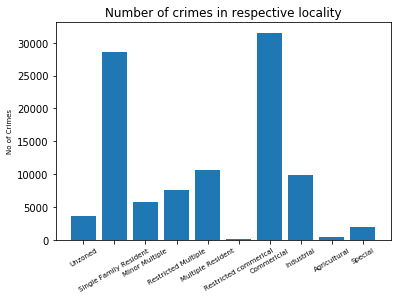

In [22]:
# asr_zone represents Accessor's zone code for nearest parcel.

df=pd.read_csv(path)

l=df.asr_zone.unique()
l.sort()
#All the unique values of the asr_zone
list1=[]
# assigning appropriate types to the values of the . azr_zone

for j in l:
    if(j == -1):
        list1.append("Unset")
    elif(j==0):
        list1.append("Unzoned")
    elif(j==1):
        list1.append("Single Family Resident")
    elif(j==2):
        list1.append("Minor Multiple")
    elif(j==3):
        list1.append("Restricted Multiple")
    elif(j==4):
        list1.append("Multiple Resident")
    elif(j==5):
        list1.append("Restricted commerical")
    elif(j==6):
        list1.append("Commericial")
    elif(j==7):
        list1.append("Industrial")
    elif(j==8):
        list1.append("Agricultural")
    elif(j==9):
        list1.append("Special")
        
def plot_bar_x():
    index = np.arange(len(list1))
    plt.bar(index,numOfCrimesInLocality)
    
    #giving the xlabel
    plt.xlabel('', fontsize=7)
    
    #giving the ylabel
    plt.ylabel('No of Crimes', fontsize=7)
    plt.xticks(index, list1, fontsize=7, rotation=30)
    
    #title of the bar plot
    plt.title('Number of crimes in respective locality')
    
    #plotting the bar plot.
    plt.show()
    
#A list to store number of crimes for repective types
numOfCrimesInLocality=[]

# to find the number of crimes for each type
for i in l:
    #finding the subset of the dataset for each asr_zone.
    subDf= df.loc[df.asr_zone==i,]
    numOfCrimesInLocality.append(subDf.shape[0])

#printing the number of crimes for each asr_zone
print(numOfCrimesInLocality)

#plotting the bar graph
plot_bar_x()

#So we observe that Most crimes occur in Commercial asr_zone.

In [3]:
# Subset of the dataset where crimes were commited in Single Family Resident zone.

SingleFamilydf=df.loc[df.asr_zone==1,]

#An empty dictionary
d={}
for i in SingleFamilydf.type:
    if(i not in d):
        d[i]=1
    else:
        d[i]=d[i]+1

max1=0
crime=""
for key in d:
    if(d[key] >max1):
        max1=d[key]
        crime=key

#the most type of crime that was committed was of the type
print("Type of crime most occurring in commercial zone is ",crime)
print(max1)

Type of crime most occurring in commercial zone is  VEHICLE BREAK-IN/THEFT
483


In [4]:
#Subset of the dataset where crimes were commited in Commercial
Comdf=df.loc[df.asr_zone==6,]

#An empty dictionary
d1={}
for i in Comdf.type:
    if(i not in d1):
        d1[i]=1
    else:
        d1[i]=d1[i]+1

max2=0
crime1=""
for key in d:
    if(d1[key] >max2):
        max2=d1[key]
        crime1=key

#the most type of crime that was committed was of the type
print("Type of crime most occurring in commercial zone is ",crime1)
print(max2)

Type of crime most occurring in commercial zone is  DRUGS/ALCOHOL VIOLATIONS
1016


##  2. We try to find out whether the frequency of crimes is more during day or night.
## For this, we use hypothesis testing.

## H0: Number of crimes in day > = crimes in night
## H1: Number of crimes in day < number of crimes in night.


In [10]:
df=pd.read_csv(path)

# taking a random sample of the data
randomSample = df.sample(n=60)
l=df.is_night.unique()
list1=[]

# count the number of crimes taking plce during day and night respectively 
for i in l:
    subDf= randomSample.loc[df.is_night==i,]
    list1.append(subDf.shape[0])
day=list1[0]
night=list1[1]
print(day)
print(night)

#finding the p value
ttest,pval = ttest_ind(day,night)

# if the pvalues is less than 0.05 then we reject the null hypothesis
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we fail to reject null hypothesis")

#So we see that we fail to reject that more crimes take place in day than in night

35
25
we fail to reject null hypothesis


C:\Users\VINU PC\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\VINU PC\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\VINU PC\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\VINU PC\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\VINU PC\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## 3. Time Series Analysis
### a) We plan to use time series to analyse the trends and seasonality in crime rates across months over the years. 

In [27]:
df = pd.read_csv(path)

# Converts date of object string to pandas date object 
df.date = pd.to_datetime(df.date , format = "%Y-%m-%d")

# Making date column as index of dataframe to ease further operations
df.index = pd.DatetimeIndex(df.date)

Text(0,0.5,'Number of crimes')

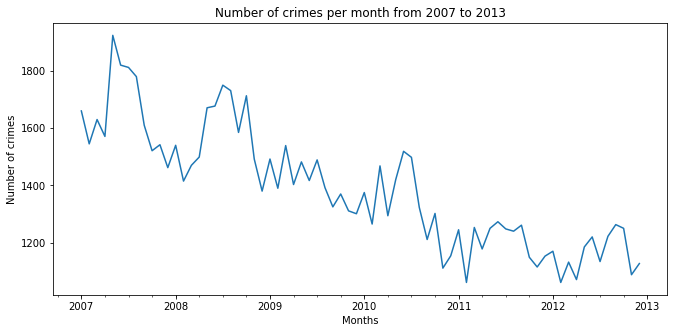

In [28]:
plt.figure(figsize = (11,5))

# Since the dataset size is large, we resample by months
df.resample('M').size().plot(legend = False)
plt.title('Number of crimes per month from 2007 to 2013')
plt.xlabel('Months')
plt.ylabel('Number of crimes')

### Generally, we see a clear drop from January to February, followed by an incline leading into March. As the year progresses closer to the months of summer, the amount of crime tends to peak. Following the rise, crime begins to drop as we approach the winter months. Next we try to analyse the trend for individual crimes

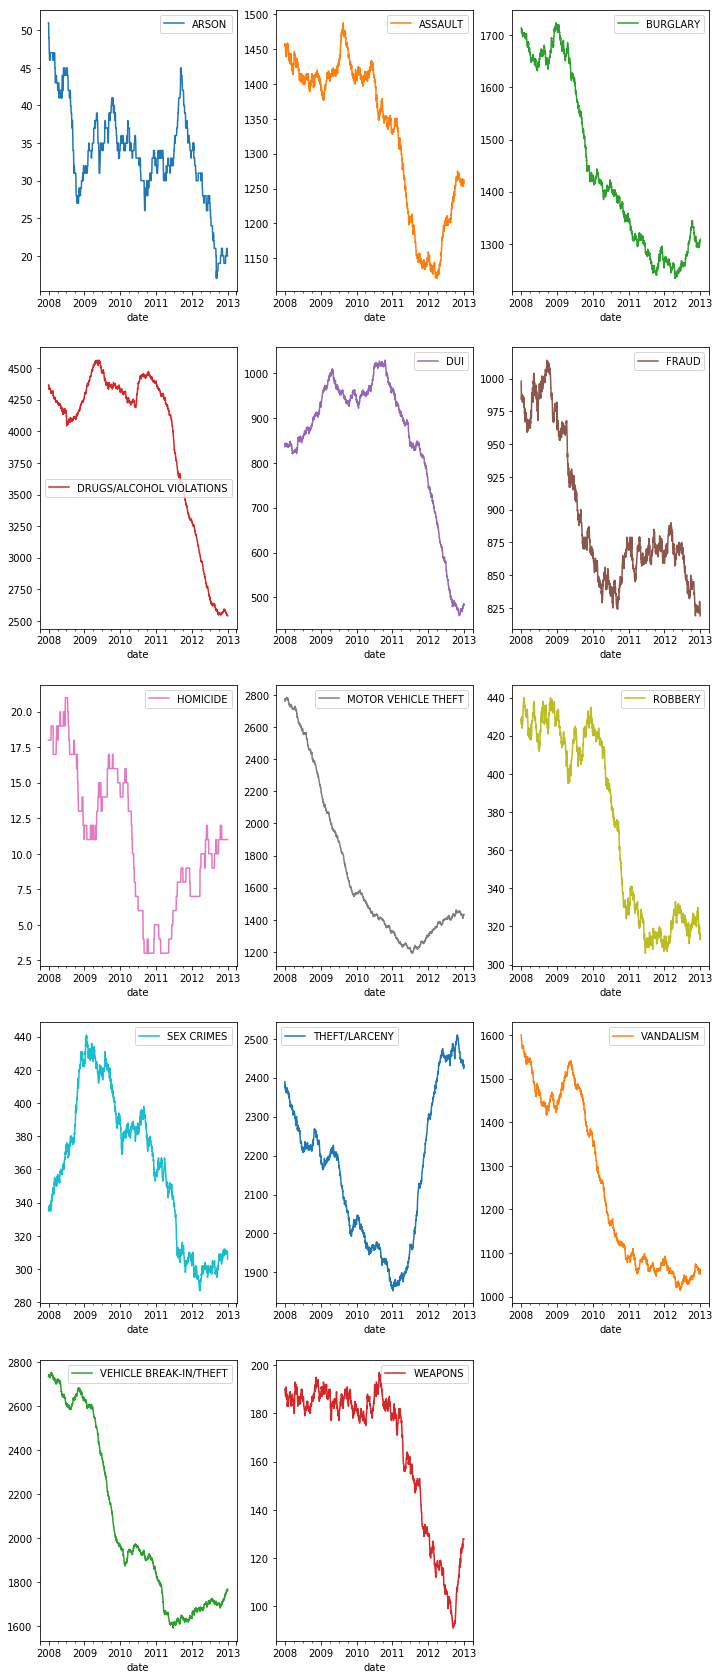

In [29]:
# Creating a pivot table for using multiple indices. Here, year is the column to aggregate
# type is the column for which 'group by' operation occurs.
crimes_count_date = df.pivot_table('year', aggfunc=np.size , columns = 'type' , index = df.index , fill_value = 0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)

# Computing a rolling sum for each year. In the rolling function, 365 is the window duration, indicates the no. of days.
# The window rolls after every 365 days.
plot = crimes_count_date.rolling(365).sum().plot(figsize=(12,30) , subplots = True , layout = (-1,3) ,sharex = False , sharey = False)

### b) We also try to find out the trends in crime that happens in the vicinity of the lamp posts. We also try to find out whether time series is stationary or not.

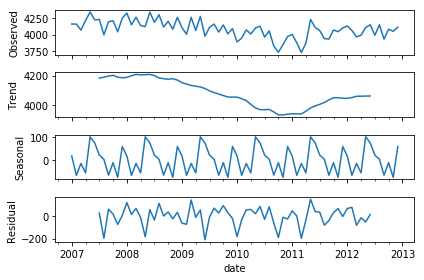

In [7]:
df = pd.read_csv(path,parse_dates =["date"],index_col ="date")

#resampling the dataset monthly across years and replacing it with mean.
df_monthly = df.lampdist.resample('M').mean()

#decompse the time series into trend,seasonality and residual
result = seasonal_decompose(df_monthly)

result.plot()
plt.show()

### To analyse more, we perform ADF test for time series

In [10]:
# without resampling for the original data adf test is conducted to chech if the time series is stationary or not

X = df['lampdist'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# Using ADF test, we can conclude that the time series is trend stationary

ADF Statistic: -316.140609
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


### Performing first order differencing in order to de trend the time series

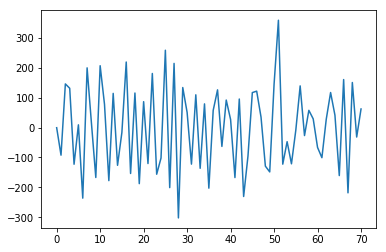

In [9]:
# Iterating over monthy resampled data , we successively find the difference between current and previous month 

diff = list()
for i in range(1, len(df_monthly)):
    value = df_monthly[i] - df_monthly[i - 1]
    diff.append(value)
plt.plot(diff)
plt.show()

## 4. We also try to find out the crime pattern at various times of the day by aggregating the hours over the years.

Text(0.5,1,'Total crimes by Time period')

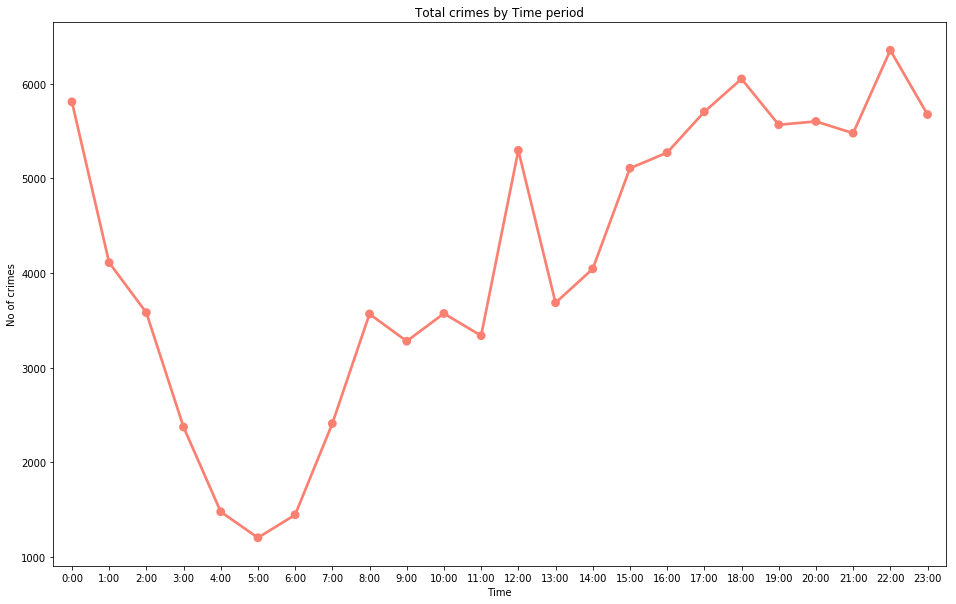

In [14]:
# Grouping by hour and making the index as 'No of crimes'
crimes_by_time = df.groupby('hour').size().reset_index(name = 'No of crimes')

# Adding :00 to end of hour 
crimes_by_time['hour'] = crimes_by_time['hour'].apply(lambda x : str(x) + ':00')
fig = plt.figure(figsize = (16,10))

# Pointplot of No. of crimes v/s hours
sns.pointplot(data=crimes_by_time , x = 'hour' , y = 'No of crimes' , color = 'salmon')
plt.xlabel('Time')
plt.ylabel('No of crimes')
plt.title('Total crimes by Time period')

### As we can see, crime happens mostly during daytime and dips in the early morning. it tells citizens and policemen when to be more careful :  throughout the day.

##  5. Visualizing the different types of crimes that occur at a particular part of the city for all cities in the dataset.

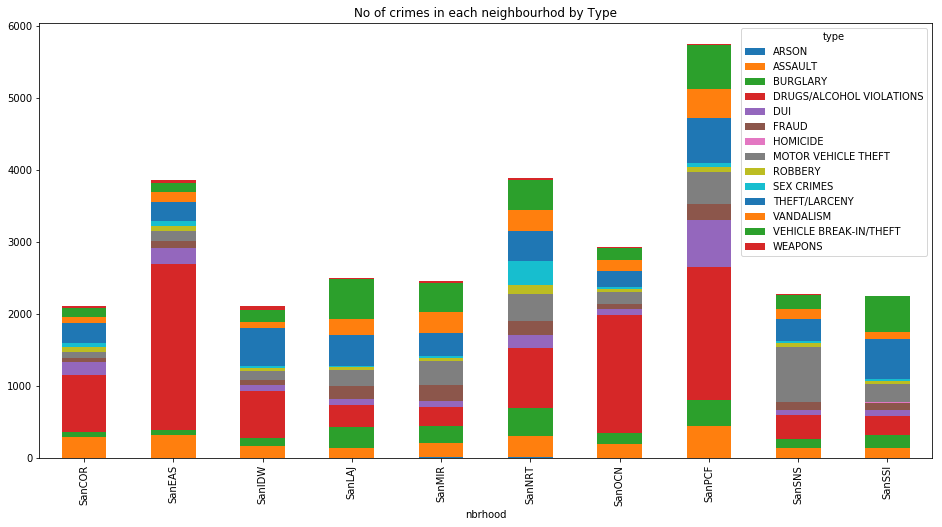

In [7]:
# Plotting Number of crimes v/s neighbourhood for various crimes

#  Getting top 10 neighbourhoods that have maximum frequency of crime. 
l = df['nbrhood'].value_counts()[:10].index.tolist()
df1 = df[df['nbrhood'].isin(l)]

# We are plotting No. of crimes in the y-axis. Therefore, we have changed index to 'No of crimes'
# Then we group by nbrhood and type of crime.
crimes_by_type = df1.groupby(['nbrhood' ,'type']).size().reset_index(name = 'No of crimes')

# For the above dataframe, 
crimes_by_type_pivot = pd.pivot_table(crimes_by_type , index = ['nbrhood'] , columns = ['type'] , values = 'No of crimes' , aggfunc = np.sum)
crimes_by_type_pivot.plot(kind = 'bar' , stacked = True , figsize = (16,8) , title = 'No of crimes in each neighbourhod by Type')

###  To Understand what type of crimes are prelevant in which neighbourhood , we have plotted a stacked bar chart of 'number of crimes' v/s 'neighbourhood'. For each neighbourhood, we can get a clear picture of distribution crimes in that neighbourhood.

 ## 6. We aim to find out places where the frequency of crime is very high based on latitude and longitude. 

### This can be done by K Means Clustering.  We have used k-means for clustering crimes based on longitude and latitude and finding out the hotspots* of crime.
### *hotspots : places where frequeny of occurance of crime is very high


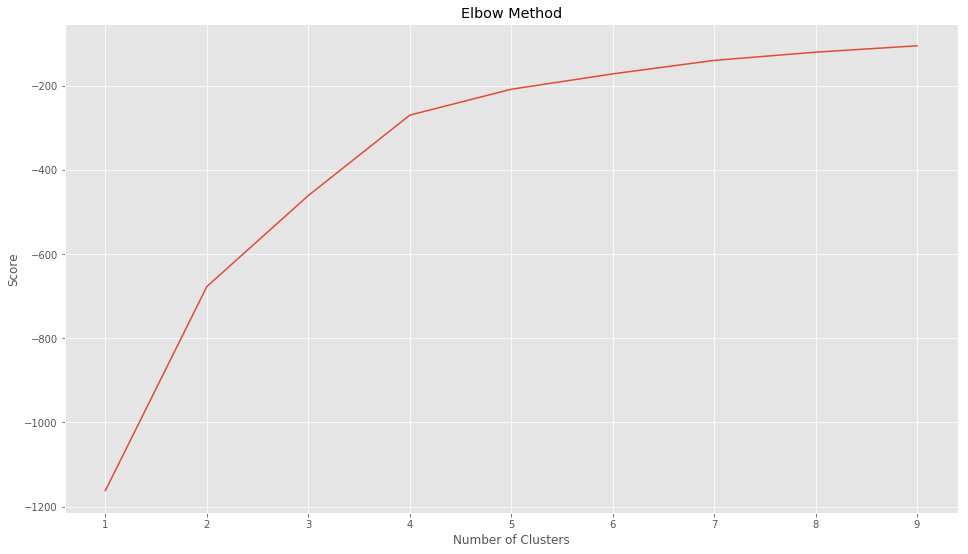

In [21]:

df = pd.read_csv(path)

# K MEANS CLUSTERING

# constructing array out of input columns : latitude and longitude
f1 = df['lat'].values
f2 = df['lon'].values
X = np.array(list(zip(f1, f2)))

# Elbow method : Finding scores for each value of k.


# Finding the optimal value of k in range of 1 to 9
number_clusters = range(1, 10)
kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]

# Fitting the model and getting the score
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Plot of score versus number of clusters
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

# From the Elbow graph, we find that elbow is formed at k=4. After k=4, the score is approximately constant.
# Therefore, this is the optimal value of k.


 ### We have used elbow plot to find the optimal value of k. 
 ### Score for the elbow plot increases till k=4 then it forms an elbow at k=4. 
### Therefore, k=4 is the optimal value. Using this value, we have performed k-means clustering on dataset. 

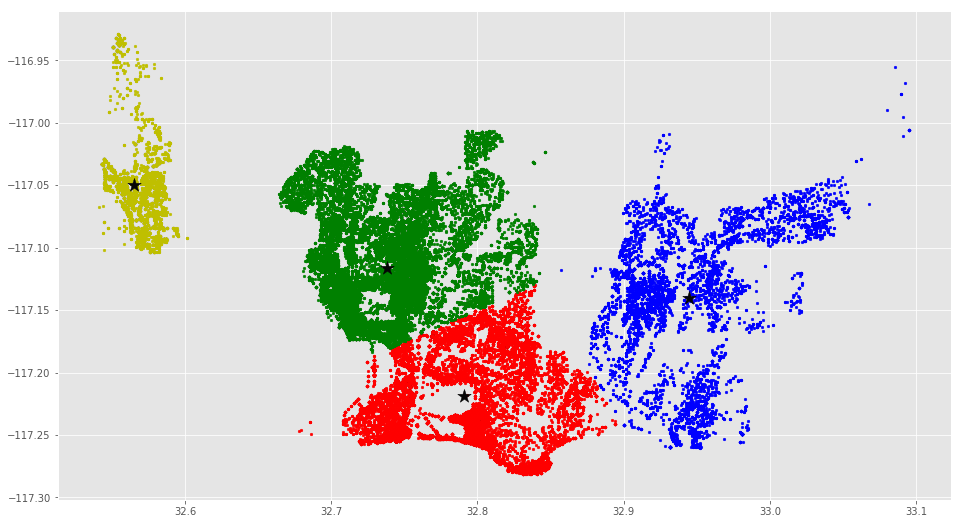

In [22]:
# Using k-means for k=4

# Number of clusters
kmeans = KMeans(n_clusters=4)

k=4

# Fitting the input data
kmeans = kmeans.fit(X)

# Getting the cluster labels
labels = kmeans.predict(X)

# Centroid values
C = kmeans.cluster_centers_

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
fig, ax = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


### In the plot above, black stars represent the mean of the clusters.

## 7.  Next, we will build a naive bayes classifier for classifying desc into type categories.

In [11]:
df = pd.read_csv(path,parse_dates =["date"],index_col ="date")

# we will add a column encoding the type as an integer because categorical variables 
# are often better represented by integers than strings.
# We also create a couple of dictionaries for future use.

#remove rows with nan values in desc column
df = df[pd.notnull(df['desc'])]

#encoding the type categorical variable type and adding a new column 
df['type_id'] = df['type'].factorize()[0]
type_id_df = df[['type', 'type_id']].drop_duplicates().sort_values('type_id')
type_to_id = dict(type_id_df.values)
id_to_category = dict(type_id_df[['type_id', 'type']].values)

#we will drop unwanted columns
df1=df.drop(columns=['id','month','hour'])

#selecting only  those features that are required 
df1=df1[['type','desc','type_id']]
#df1

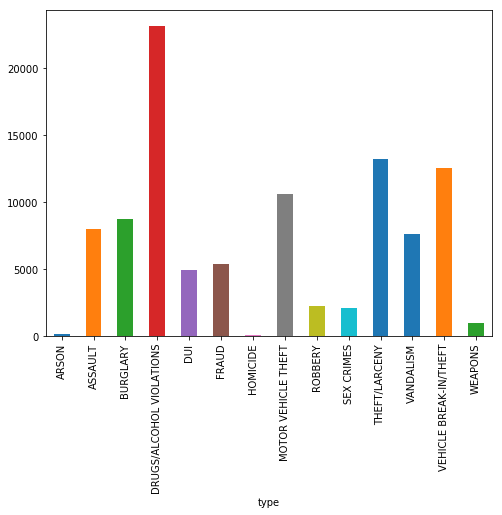

In [12]:
# to check if the classes are imbalanced

fig = plt.figure(figsize=(8,6))
df1.groupby('type').desc.count().plot.bar(ylim=0)
plt.show()

### The above graph shows that the desc is more biased therefore standard algorithms will not work but in text classification we need maximum accuracy therefore we leave it as it is.

### To extract features we should take into account each word therefore we will consider tf-idf for this reason subliear_tf = True is to use logarithmic form for frequency. 
### min_df = 2  is the minimum numbers of documents a word must be present in to be kept. Norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1. 
### ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.


In [15]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df1.desc).toarray()
labels = df1.type_id
features.shape

# The result indicates that 99992 desc is represented by 1009 features

(99992, 1009)

In [16]:
# we will find the terms that are the most correlated with each of the products:
N = 2
for type, type_id in sorted(type_to_id.items()):
  features_chi2 = chi2(features, labels == type_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(type))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'ARSON':
  . Most correlated unigrams:
. structure
. arson
  . Most correlated bigrams:
. structure forest
. arson property
# 'ASSAULT':
  . Most correlated unigrams:
. injury
. battery
  . Most correlated bigrams:
. bodily injury
. battery bodily
# 'BURGLARY':
  . Most correlated unigrams:
. residential
. burglary
  . Most correlated bigrams:
. commercial burglary
. residential burglary
# 'DRUGS/ALCOHOL VIOLATIONS':
  . Most correlated unigrams:
. disorderly
. conduct
  . Most correlated bigrams:
. conduct alcohol
. disorderly conduct
# 'DUI':
  . Most correlated unigrams:
. drugs
. dui
  . Most correlated bigrams:
. alcohol drugs
. dui alcohol
# 'FRAUD':
  . Most correlated unigrams:
. theft
. fraud
  . Most correlated bigrams:
. break theft
. vehicle break
# 'HOMICIDE':
  . Most correlated unigrams:
. specified
. murder
  . Most correlated bigrams:
. murder degree
. degree specified
# 'MOTOR VEHICLE THEFT':
  . Most correlated unigrams:
. owner
. consent
  . Most correlated bigram

In [29]:
# The above are most correlated unigram and bigrams for each type.

In [17]:
# Training the naive bayes model
# we will use multinomial naive bayes classifier since it is a multiclass classification.

X_train, X_test, y_train, y_test = train_test_split(df1['desc'], df1['type'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [18]:
# The following some rows are used for checking the prediction by giving various inputs to the above trained model 

print(clf.predict(count_vect.transform(['Residential Burglary'])))
print(clf.predict(count_vect.transform(['Battery with serious body injury'])))
print(clf.predict(count_vect.transform(['Disorderly conduct alcohol'])))
print(clf.predict(count_vect.transform(['illegal possess tear gas'])))
print(clf.predict(count_vect.transform(["TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT"])))

['BURGLARY']
['ASSAULT']
['DRUGS/ALCOHOL VIOLATIONS']
['WEAPONS']
['MOTOR VEHICLE THEFT']


In [20]:
# testing the trained model by giving X_test part of the splitted dataset 
y_pred=clf.predict(count_vect.transform([x for x in X_test]))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# The total number of rows => 74994+24998 =99992 therefore it is completely tested and successful.

Accuracy: 0.9878390271221698
